## Image Reconstruction using Convolutional Autoencoder on CIFAR10 Subset Data
### Problem Description
#### The goal of this assignment is to build a Convolutional Autoencoder (CAE) for image reconstruction using a subset of the CIFAR dataset. The CIFAR dataset consists of 60,000 32x32 color images in 10 different classes. For this assignment, you will be provided with a subset of the CIFAR dataset consisting of 40 images for training and 8 images for testing, selected from one or more classes.

### Objectives
#### Understand the structure and components of Convolutional Autoencoders.
#### Implement a Convolutional Autoencoder using PyTorch to reconstruct images from the CIFAR subset.
#### Train the Autoencoder on the provided training data and evaluate its performance on the test data.

### Input
#### CIFAR-10 Subset: The dataset contains images categorized into the following 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. But for this assignment the subset contains only first four classes: airplane, automobile, bird and cat
#### Training Data: 40 images
#### Testing Data: 8 images
#### Model Architecture: You will design and implement a Convolutional Autoencoder model, which may include convolutional layers, pooling layers, upsampling layers, and a latent space representation.

### Import Required Libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn

### Preprocessing and EDA

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Load training and testing data

In [ ]:
# Define a custom dataset class
class CustomCIFAR10Dataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        img, label = self.data[idx], self.labels[idx]
        img = img.transpose((1, 2, 0))  # Convert to HWC format
        img = Image.fromarray(img.astype('uint8'))  # Convert to PIL image
        if self.transform:
            img = self.transform(img)
        return img, label

In [ ]:
# Load the saved CIFAR10 data subsets using PyTorch
train_subset_data = np.load('data/train_cifar.npy')
train_subset_labels = np.load('data/train_cifar_target.npy')
test_subset_data = np.load('data/test_cifar10.npy')
test_subset_labels = np.load('data/test_cifar_target.npy')

#### Initialize train and test loaders

In [ ]:
# Create an instance of the CustomCIFAR10Dataset for the training subset,
# using the provided training data and labels, and apply the specified transformations.
train_dataset = CustomCIFAR10Dataset(train_subset_data, train_subset_labels, transform=transform)

In [ ]:
# Create an instance of the CustomCIFAR10Dataset for the test subset,
# using the provided test data and labels, and apply the specified transformations.
# hint: test_dataset = <>
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Create a DataLoader for the training dataset with a batch size of 4 and shuffling enabled.
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

In [ ]:
# Print some information about the subsets
print(f'Train Size: {len(train_dataset)}')
print(f'Test Size: {len(test_dataset)}')
# Example of iterating through the DataLoader
for images, labels in train_loader:
    print(f'Batch of images shape: {images.shape}')
    print(f'Batch of labels shape: {labels.shape}')
    break   

In [ ]:
# Create a DataLoader for the test dataset with a batch size of 4 and shuffling disabled.
# hint: test_loader = <>
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Define the list of class names corresponding to the CIFAR-10 dataset labels.
# hint1: Check the problem description and the input at the beginning of this Notebook
# hint2: classes = ['airplane', 'automobile'....]

# YOUR CODE HERE
raise NotImplementedError()

#### Display random images from training and testing dataset

In [ ]:
# Utility functions to un-normalize and display an image
def imshow(img):
    img = img / 2 +0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Get some random test images for display
# Step1: Create an iterator from the test data loader
# Step2: Get the next batch of images and labels from the iterator
# Step3: Display the images in a grid using the imshow function
# Step4: Print the labels of the images in the batch
# hint: Refer the code in the above cell that displays training images

# YOUR CODE HERE
raise NotImplementedError()

### Design simple Convolutional AutoEncoder architecture

#### Design the following Convolutional AutoEncoder Neural Network architecture for Image Processing
#### and reconstruction, apply the Pooling, Activation functions as per the below design

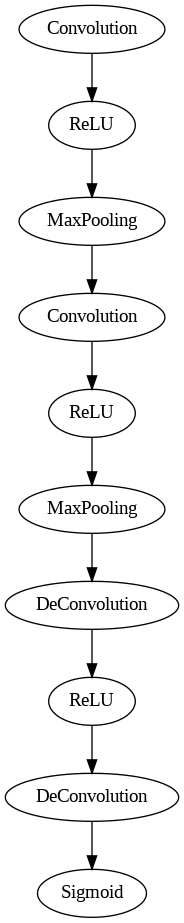

In [ ]:
# Define the Convolutional Autoencoder
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder Layers
        # First convolutional layer: input channels = 3 (RGB image), output channels = 16, 
        #                            3x3 kernel size, padding = 1
        # Second convolutional layer: input channels = 16, output channels = 4, 
        #                            3x3 kernel size, padding = 1
        # Max pooling layer with 2x2 kernel, and stride = 2 to downsample feature maps
        #
        # Decoder Layers
        # First transposed convolution (deconvolution) layer: 
        #                            input channels = 4, output channels = 16, 
        #                            2x2 kernel, stride = 2
        # Second transposed convolution (deconvolution) layer: 
        #                           input channels = 16, output channels = 3, 
        #                           2x2 kernel, stride = 2
        ## hint: Use Class variables, e.g self.conv1, self.pool, self.t_conv1
        #
        # YOUR CODE HERE
        raise NotImplementedError()
        
    def forward(self, x):
        # Apply the first convolutional layer followed by ReLU activation
        # Apply max pooling to reduce spatial dimensions
        # Apply the second convolutional layer followed by ReLU activation
        # Apply max pooling again to further reduce spatial dimensions
        # Apply the first transposed convolution layer followed by ReLU activation to begin reconstruction
        # Apply the second transposed convolution layer followed by Sigmoid activation to reconstruct the image
        #
        # YOUR CODE HERE
        raise NotImplementedError()
        return x

In [ ]:
# Instantiate the model
model = ConvAutoEncoder()
print(model)

#### Select loss and optimizer functions

In [ ]:
# Set loss function and optimizer
# Use Binary Cross Entropy loss and assign it to criterion object
# Create and initialize the loss function to Binary Cross Entropy Loss

# YOUR CODE HERE
raise NotImplementedError()

# Create and initialize the optimizer to Adam optimizer
# The learning rate (lr) is set to 0.001, which controls the step size for updating the model parameters
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Training function
# hint1: train(model, train_loader, <loss_function_obj>, <optimizer_obj>, num_epochs=2)
# hint2: replace criterion and optimizer with your <loss_function_obj> and <optimizer_obj> respectively
def train(model, train_loader, criterion, optimizer, num_epochs=2):    
    # Set the model to training mode
    # This is important for certain layers like dropout and batch normalization, 
    #                     which behave differently during training and evaluation
    model.train()
    for epoch in range(num_epochs):
        # Initialize the running loss to zero before starting the training loop
        # Loop over the training data in batches
        #    Zero the gradients for the optimizer
        #    Forward pass: compute the model output for the given inputs
        #    Compute the loss between the predicted outputs and the actual labels
        #    Backward pass: compute the gradient of the loss with respect to model parameters
        #    Perform a single optimization step to update the model parameters
        #    Accumulate the loss for reporting
        #    Print the average loss for every <n> mini-batches
        # YOUR CODE HERE
        raise NotImplementedError()
    

In [ ]:
# Train the model
num_epochs = 5
# Invoke the train function to kick off the learning
# Pass arguments: model, loader, loss, optimizer, num of epochs
# hint: train(model, train_loader, <loss_function_obj>, <optimizer_obj>, num_epochs)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [ ]:
# Sample outputs
output = model(images)
images = images.numpy()

In [ ]:
# Ensure the output shape is correct
print(f'Output shape: {output.shape}')  # Should be [4, 3, 32, 32]

In [ ]:
batch_size = 4
output = output.view(batch_size, 3, 28, 28)
output = output.detach().numpy()

In [ ]:
# Original images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(4,2))
for idx in np.arange(2):
    ax = fig.add_subplot(1, 2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.show()

# Reconstructed images
print("Reconstructed Images")
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(4, 2))
for idx in np.arange(2):
    ax = fig.add_subplot(1, 2, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])
    
plt.show()